# Peer-graded Assignment: Capstone Project - The Battle of Neighborhoods
# *Choose the right hotel to stay in*

Author: Radoslaw Cholewinski

Date: May 2020

The report is organized in six sections:
1. Introduction/Business Problem
2. Data
3. Methodology 
4. Results
5. Discussion
6. Conclusions

## 1. Introduction/Business Problem

As the coronavirus outbreak has dominated everyone's life on the planet, I am wondering when people could travel again. I made couple of plans for this year I need to postpone, but I thought I could use that travel-free time to build some tools for more efficient travel choices in the future. As the capstone project, I decided to develop a simple model which groups hotels in a given city into clusters based on facilities and services available in the neighborhood of each hotel. Travel search engines provide users with (sometimes very long) lists of possible accommodation options, but in my opinion they still fail to properly cluster hotels as e.g. 'close to restaurants' or 'close to sightseeings' or 'located in a remote area', which would facilitate the search process.

I decided to develop my model for Naples, Italy, where I planned to be right now instead of sitting on my balcony. The model can be however easily generalized to any place in the world. I haven't been in Naples yet and have limited knowledge of Naples boroughs. As there are numerous hotels there, I would like to divide them into groups, see in what terms the groups differ and narrow my search to a possibly limited number of hotels residing in a group of my choice. In my case it would be a proximity of pizza places, Italian restaurants and public transport options.

Other, more commercial, applications of this model are possible. A hotel search engine could add a new filter to cluster the results as described in the first paragraph, so users find their desired accommodation easier and faster. Or a booking website could use clusters to identify hotels which are most attractive to prospective clients and discriminate the commission the hotel pays to the website on that basis. The booking website could also target its users by recommending them hotels basing on the cluster hotels belong to and the reservations users made before. To add more, local authorities could differentiate tourist tax levels basing on the attractiveness of each cluster.   



## 2. Data

In this project data provided by the Foursquare API is used. Foursquare lists *inter alia* hotels and provides recommended venues near a given hotel. A Foursquare 'explore' endpoint is used to get a list of recommended hotels in Naples. The total number of results is 98. While in theory Foursquare API returns up to 50 results only, the query surprisingly retrieved 89 results, without any need for further experimentation with the API. In the author's opinion, 89 options are pretty sufficient to choose a desired hotel.

Next, for each hotel an 'explore' query is performed to find all the venues within a walking distance, set to 500 meters. Foursquare API enables to retrieve, apart from the location data, the venue category data easily. 3600 venues are found, which means an average hotel is located within a walking distance to approximately 40 venues. 139 distinct venue categories are returned. 

The next sections describes the clustering process, discusses the results and major findings.

## 3. Methodology

To separate hotels into clusters, the simple *k*-means algorithm is performed. The algorithm looks at features of individual hotels and separates them into possibly homogeneous groups. The criterion of the homogeneity is the sum of squared differences between the features, computed for each cluster and summed over clusters (known as inertia). Two methodological questions arise here: what are the features and how to set value for *k*?

Features are obtained in two steps. Firstly, all venues are one-hot encoded according to their category. For each hotel and venue category, number of occurrences of a given venue category is computed. That sum is not yet really informative, as there can be lots of Italian restaurants near a single hotel, but there will be no more than one airport. 

In the week 3 lab example, the number of occurrences of a given category was normalized by the total number of venues in a neighborhood. While that is a smart approach for an analysis of neighborhoods (areas), it gets more complicated with hotels (single points). There can be e.g. only one venue in a hotel's vicinity, say one restaurant, but that doesn't mean the hotel's neighborhood is densely populated with restaurants. 

Other approach is proposed. In the second step, the number of occurrences of a given category is divided by the largest number of occurrences of that category for all hotels. That yields a 'score', whether there are relatively many or relatively few venues of a given category in a hotel's neighborhood. If, for example, there are 50 Italian restaurants near one hotel and the maximum number of Italian restaurants nearby for all hotels is 100, the score is 50/100 = 0.5


An important question arises how to set *k*. It can be shown that the larger the *k* value, the lower the inertia gets. The limiting case is if *k* equals the number of hotels, so every hotel becomes a single cluster. That is achieved at the expense of possibility to assign meaningful labels to individual clusters. With respect to the spatial data, another interesting question is whether the cluster members are physically grouped together, i.e. if the clustering algorithm separates the space into non-overlapping neighborhoods, or if a more complex lines of division emerge.

As I believe, setting the right value of *k* for that problem could be more an art than science, I suggest to inspect where the inertia shows the steepest decline, start with a reasonably small *k* value and proceed with incrementing *k* until the resulting new clusters are either too small or lack a clear pattern of differentiation. On the contrary, if increasing *k* helps disseminate the space into possibly non-overlapping, clearly bordered neighborhoods, I would suggest to keep increasing it.

## 4. Results

As outlined in Section 3, *k*-means algorithm is performed on hotel scores for values of *k* from 1 (a single cluster) to 10. The steepest decline in the inertia value is recorded for *k* between 2 and 7. 

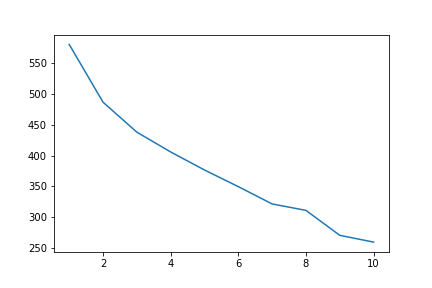

After *k* value is increased to 3 and 4, the algorithms keeps intersecting the hotels into some clearly bordered neighborhoods and some 'other' group spread across the city. Moreover, for *k* = 4, these neighborhoods can be easily labeled in terms of the most common venues. The latter are defined as the venue categories with the highest combined (arithmetic mean) score for all hotels within a cluster. 

Cluster Label | 1st Most Common Venue | 2nd Most Common Venue | 3rd Most Common Venue | 4th Most Common Venue | 5th Most Common Venue
------------- | --------------------- | -------- | -------- |-------- |-------- |
 0 | Deli / Bodega           | Sandwich Place          | Fried Chicken Joint     | Comic Shop              | Plaza                   
 1 | Pizza Place             | Convenience Store       | Diner                   | Light Rail Station      | Italian Restaurant   
 2 | Asian Restaurant        | Convenience Store       | Fountain                | Hotel                   | Hostel                 
 3 | Bakery                  | Food & Drink Shop       | Gift Shop               | Candy Store             | Food                    |

After *k* is set to 5, the resulting new cluster is comprised of two hotels only. For that reason, I suggest to set *k* = 4. The resulting clusters could be interpreted as follow:

0) Places like deli/bodegas usually cater for tourists, and fried chicken joints are close to frequently visited places like Italian plaza, but they look similar everywhere in the world. That may sound like a tourist trap, but if you like to stay close to businesses heavily oriented for tourists, go for it.

1) Pizza place and Italian restaurant sound like a true experience of Naples, while convenience stores and access to public transport make your stay comfortable. That's a cluster I'd personally choose.

2) This cluster is full of hotels, hostels, Asian restaurants and convenience stores. Choose that one of you want to stay in a typical hotel district.

3) Bakery, drink shop, gift shop, candy store - that sounds like the main train station neighborhood. It might be an option if you're staying just overnight.

Let's visualize the results. Interestingly, hotels in cluster #1 are spread across the city (blue dots), cluster #0 (red ones) and #2 (pink) are close to the main tourist sights, and cluster #3 (green) is indeed located near the train station!

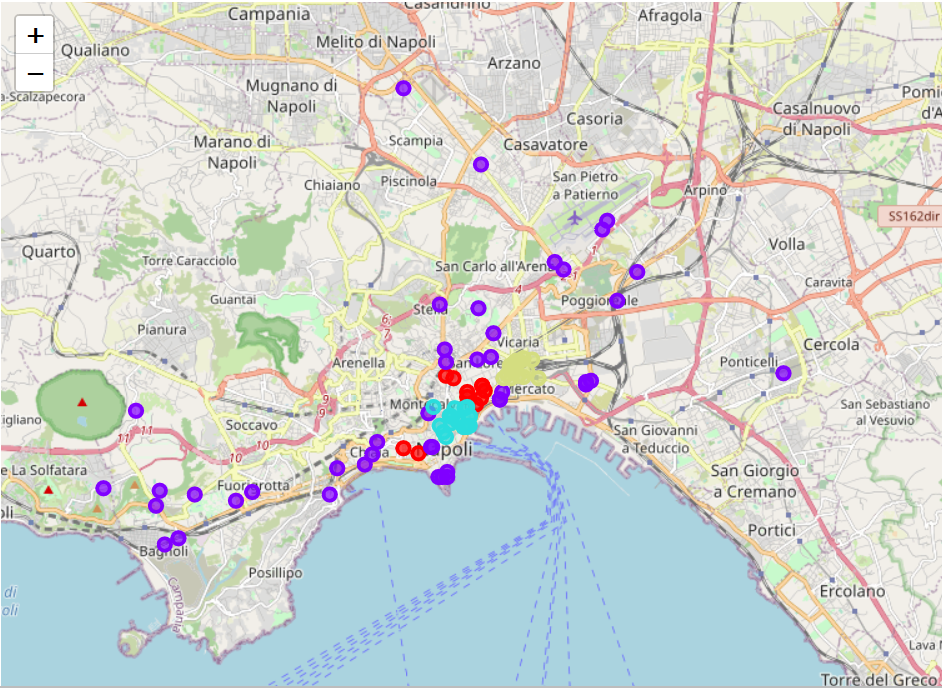

## 5. Discussion

The *k*-means algorithm successfully grouped hotels in Naples into a reasonably small number of clusters. These cluster could be labeled as catering for different kinds of tourists, as they have distinct characteristics. There is a hotel cluster close to the train station, which is quite usual for (not only) Italian cities, a cluster close to main tourist spots (which are unfortunately accompanied by tourist traps), a typical hotel district, plus a number of hotels spread across the city, which do not share a common physical location, but are close to pizza places, Italian restaurants and public transport. The latter could be definitely a choice for independent travelers and it got my attention.

As my preferred cluster cannot be assigned to a specific neighborhood, I would definitely be unable to narrow my search to that cluster when using any existing search engine. They offer only simple filters like 'close to the train station', 'close to a landmark' or location in specific neighborhoods. It turns out there are numerous hotels, which while satisfying my criteria of venues nearby are located quite dispersedly, and it would take a quite considerable amount of time to find all of them. The algorithm described above saves that time and provides results efficiently. 

## 6. Conclusions

This report presents an application of *k*-means algorithm to cluster hotels in Naples, Italy into a small number of distinct groups based on venues which are located within a walking distance from each hotel. Hotel location data as well as venues nearby are retrieved from the API provided by Foursquare. It turns out that hotels in Naples can be clustered into four groups catering for different tourist needs. A cluster for independent travelers could be identified. That cluster is comprised of hotels spread across the city, while other clusters are rather grouped into physical neighborhoods. So it makes sense to use that algorithm while searching for accommodation, as not every cluster can be assigned to a specific neighborhood, and search engines do not offer so far so complex filter options.

The tools presented in this report could be easily generalized to any other place on earth. They could be also easily incorporated into existing search engines, by providing users with more complex filters. Hotel clusters could be labeled by the most common venues in a given neighborhood and visualized graphically so the user gets sense of individual clusters.

There are numerous commercial applications of the tools presented in this report, going beyond enhancing user experience of search engines. Booking sites could cluster hotels in more efficiently and target users with specific content. They could also discriminate commission charged from hotels. Last but not least, local authorities could differentiate tourist tax levels based on a cluster a given hotel belongs to.